In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Deterministic Samples & Random Samples Using `np.random.choice` ##

We load in a dataset of all United flights national flights from 6/1/15 to 8/9/15, their destination, and how long they were delayed in minutes.

In [2]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(0, united.num_rows))
united

Date,Flight Number,Destination,Delay,Row
6/1/15,73,HNL,257,0
6/1/15,217,EWR,28,1
6/1/15,237,STL,-3,2
6/1/15,250,SAN,0,3
6/1/15,267,PHL,64,4
6/1/15,273,SEA,-6,5
6/1/15,278,SEA,-8,6
6/1/15,292,EWR,12,7
6/1/15,300,HNL,20,8
6/1/15,317,IND,-10,9


Some deterministic samples:

In [3]:
# The same destination
united.where("Destination", "JFK")

Date,Flight Number,Destination,Delay,Row
6/1/15,502,JFK,-4,26
6/1/15,637,JFK,141,33
6/1/15,704,JFK,-8,39
6/1/15,758,JFK,-5,50
6/1/15,760,JFK,352,51
6/1/15,824,JFK,3,56
6/1/15,898,JFK,290,57
6/2/15,502,JFK,0,179
6/2/15,637,JFK,202,188
6/2/15,704,JFK,-11,194


In [4]:
# Every 1,000 flights
united.take(np.arange(0, united.num_rows, 1000))

Date,Flight Number,Destination,Delay,Row
6/1/15,73,HNL,257,0
6/7/15,1692,EWR,7,1000
6/14/15,824,JFK,-1,2000
6/21/15,217,EWR,5,3000
6/27/15,1401,SAN,-4,4000
7/4/15,1614,LAS,-2,5000
7/11/15,401,CLE,4,6000
7/17/15,1645,IAD,0,7000
7/24/15,624,ORD,61,8000
7/30/15,1728,ORD,209,9000


In [5]:
# Random row numbers
united.take(make_array(77, 103, 2405))

Date,Flight Number,Destination,Delay,Row
6/1/15,1156,EWR,10,77
6/1/15,1474,DEN,-1,103
6/17/15,256,AUS,205,2405


A random sample:

In [6]:
# A random sample
start = np.random.choice(np.arange(united.num_rows))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample

Date,Flight Number,Destination,Delay,Row
8/16/15,1559,IAH,1,11605
8/23/15,1197,IAH,20,12605
8/30/15,1127,ORD,-4,13605


## Distributions Using `sample` ##

In [7]:
# A table called `die` where each row represents a side of a die
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [8]:
# Randomly sample 10 rolls of a die 
die.sample(10)

Face
1
1
5
3
5
1
4
6
3
2


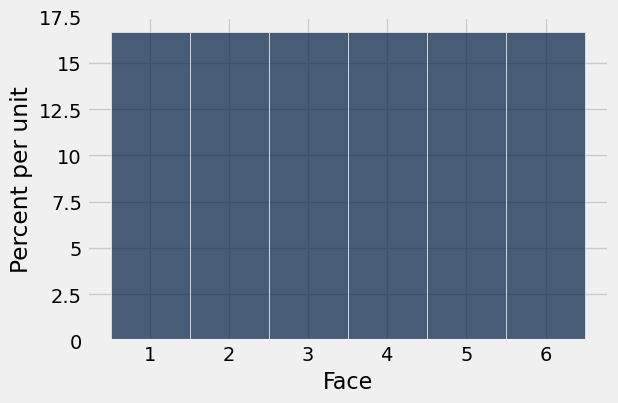

In [9]:
# Probability distribution
die.hist(bins=np.arange(0.5, 6.6, 1))

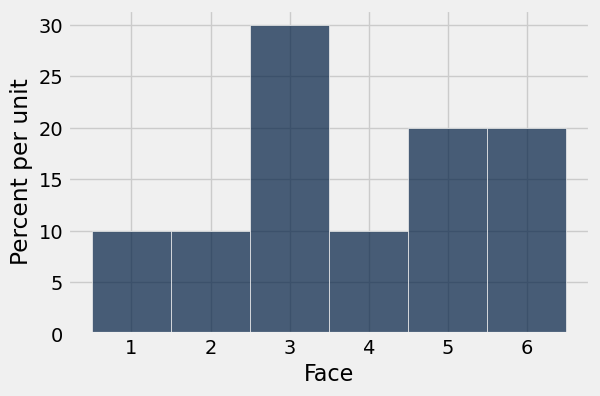

In [10]:
# Empirical distribution of 10 rolls
die.sample(10).hist(bins=np.arange(0.5, 6.6, 1))

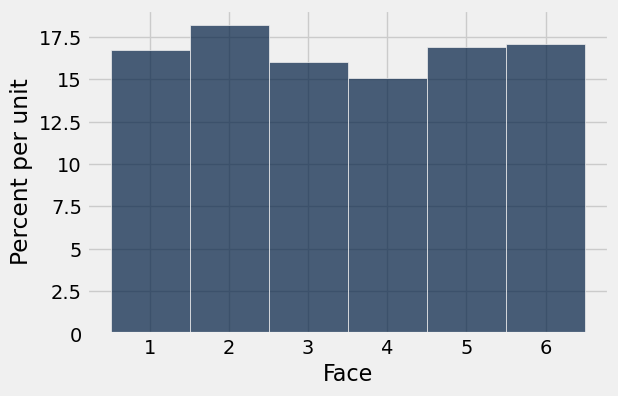

In [11]:
# Empirical distribution of 1,000 rolls
die.sample(1000).hist(bins=np.arange(0.5, 6.6, 1))

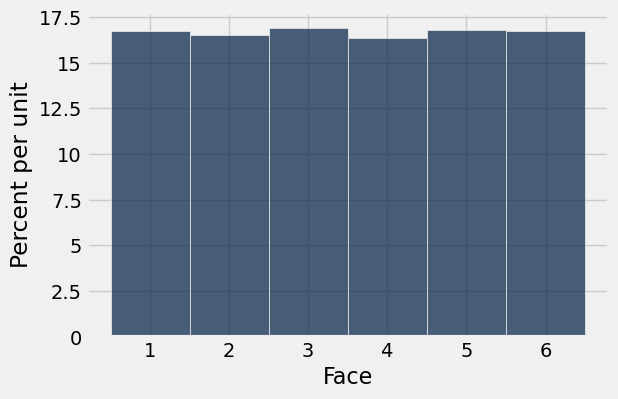

In [12]:
# Empirical distribution of 10,000 rolls
die.sample(10000).hist(bins=np.arange(0.5, 6.6, 1))

## Large Random Samples

Here, we create bins that range from -20 to 200 and have a step size of 5. We'll use these bins to visualize the distribution of United flights.

In [13]:
# Create bins & show the table again
united_bins = np.arange(-20, 201, 5)

united

Date,Flight Number,Destination,Delay,Row
6/1/15,73,HNL,257,0
6/1/15,217,EWR,28,1
6/1/15,237,STL,-3,2
6/1/15,250,SAN,0,3
6/1/15,267,PHL,64,4
6/1/15,273,SEA,-6,5
6/1/15,278,SEA,-8,6
6/1/15,292,EWR,12,7
6/1/15,300,HNL,20,8
6/1/15,317,IND,-10,9


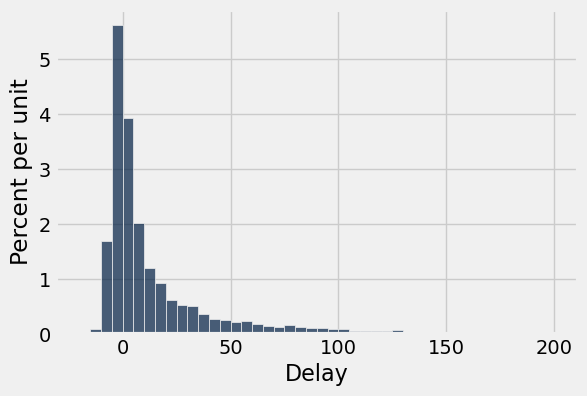

In [14]:
# Probability Distribution
united.hist('Delay', bins = united_bins)

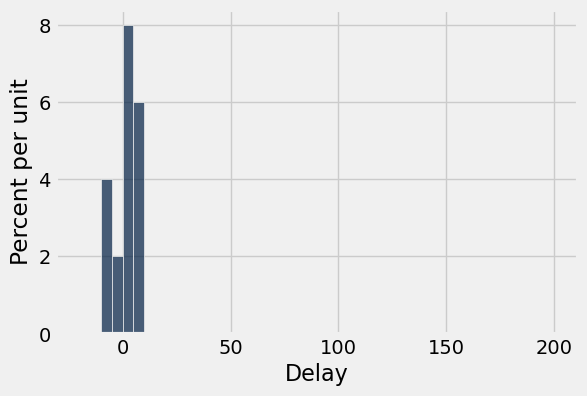

In [15]:
# Empirical Distribution of 10 flights
united.sample(10).hist('Delay', bins = united_bins)

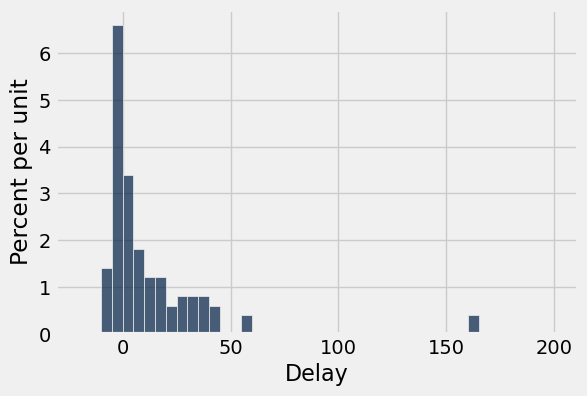

In [16]:
# Empirical Distribution of 100 flights
united.sample(100).hist('Delay', bins = united_bins)

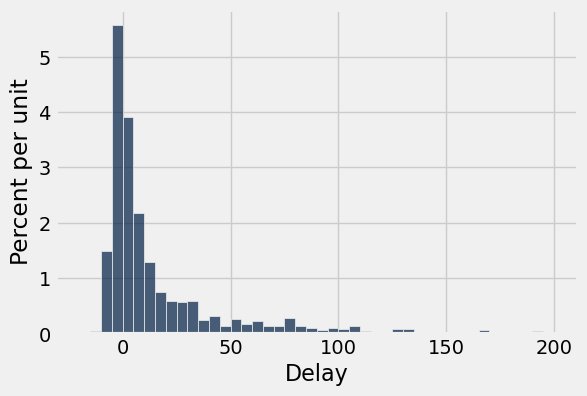

In [17]:
# Empirical Distribution of 1,000 flights
united.sample(1000).hist('Delay', bins = united_bins)

## Random Samples Using `sample_proportions`

According to the CDC, about 10% of Americans 18 and over suffer from a depressive illness in any given year. [[source](https://www.cdc.gov/workplacehealthpromotion/health-strategies/depression/index.html)]

In [18]:
# Probability distribution
distribution_in_pop = make_array(0.9, 0.1)
distribution_in_pop

array([0.9, 0.1])

Suppose you have a group of 100 people. Let's simulate how many might suffer from a depressive illness, assuming we can treat each person as if they were drawn randomly from the population of US adults (a dubious assumption).

In [20]:
# Empirical distribution
distribution_in_sample = sample_proportions(100, distribution_in_pop)
distribution_in_sample

array([0.83, 0.17])